## El atractor de Lorenz

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

In [2]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [3]:
save_folder = 'images/lorenz-animate'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [4]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 1
end_time = 60
interval = 100
time_points = np.linspace(start_time, end_time, end_time * interval)

In [5]:
# define the lorenz system
def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

In [6]:
# plot the system in 3 dimensions
from matplotlib import cm
def plot_lorenz(xyz, n):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    
    ax.plot(x, y, z, color= "turquoise", alpha=0.7, linewidth=0.7)
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    ax.set_title('Lorenz system attractor', fontproperties=title_font)
    
    plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()

In [7]:
# return a list in iteratively larger chunks
def get_chunks(full_list, size):
    size = max(1, size)
    chunks = [full_list[0:i] for i in range(1, len(full_list) + 1, size)]
    return chunks

In [8]:
# get incrementally larger chunks of the time points, to reveal the attractor one frame at a time
chunks = get_chunks(time_points, size=20)

In [9]:
# get the points to plot, one chunk of time steps at a time, by integrating the system of equations
points = [odeint(lorenz_system, initial_state, chunk) for chunk in chunks]

In [10]:
# plot each set of points, one at a time, saving each plot
for n, point in enumerate(points):
    plot_lorenz(point, n)

# Animación

In [11]:
# create a tuple of display durations, one for each frame
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 5 #show all other frames for 5 ms
durations = tuple([first_last] + [standard_duration] * (len(points) - 2) + [first_last])

In [12]:
# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'images/animated-lorenz-attractor.gif'

In [13]:
# save as an animated gif
gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

In [14]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) == len(durations)

True

In [15]:
IPdisplay.Image(url=gif_filepath)

## Código de animación alternativo
- https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/

In [16]:
import numpy as np
from scipy import integrate

# Note: t0 is required for the odeint function, though it's not used here.
def lorentz_deriv(params, t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    x, y, z = params
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

x0 = [1, 1, 1]  # starting vector
t = np.linspace(0, 3, 1000)  # one thousand time steps
x_t = integrate.odeint(lorentz_deriv, x0, t)

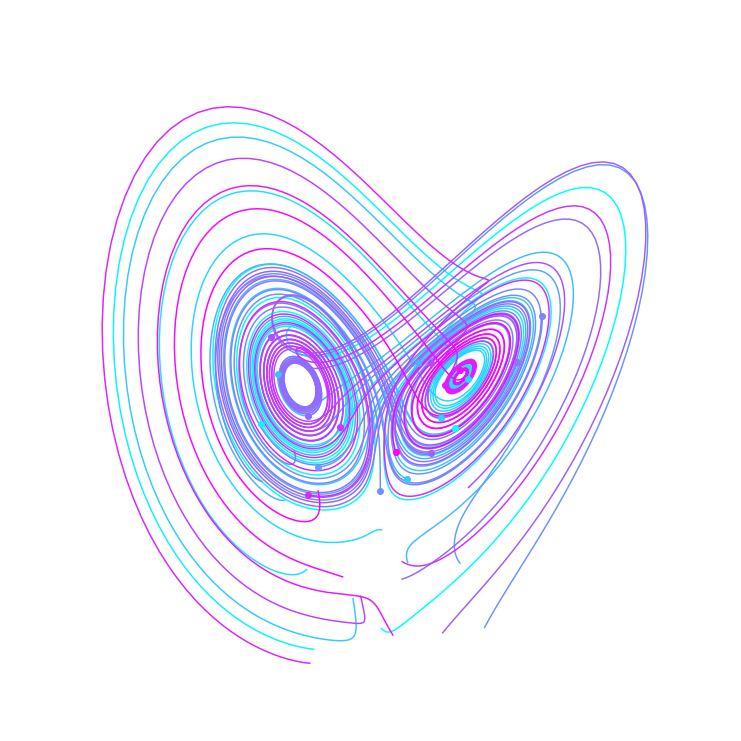

In [17]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

N_trajectories = 20


def lorentz_deriv(params, t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    x, y, z = params
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Elige valores iniciales aleatorios uniformemente distribuidos de -15 a 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 4, 1000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Establecer figura y ejes 3D para animación
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# Colores diferentes para cada trayectoria
colors = plt.cm.cool(np.linspace(0, 1, N_trajectories))

# Establecer lineas y puntos
lines = [ax.plot([], [], [], '-', c=c)[0]
for c in colors]
pts = [ax.plot([], [], [], 'o', c=c)[0]
for c in colors]

# Límites de los ejes
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# Punto de vista del objeto (grados de altitud, grados de azimutal)
ax.view_init(30, 0)

# Inicialización de la función: grafica el fondo para cada marco
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# Funcion de animacion. Esto va a ser llamado secuencialmente con el número de figura
def animate(i):
    # Avanzará dos pasos de tiempo por figura para tener mejores resultados.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# Inctancia del animador
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=True)

#Guardar como .mp4 (Requiere mplayer o ffmpeg instalados)
anim.save('lorentz_attractorg1.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()